In [1]:
import torch
import pandas as pd
import numpy as np
# 新数据
# 读取所有数据
paths = [
    # '../data/processed_data_900_1.csv', '../data/processed_data_900_2.csv', '../data/processed_data_900_3.csv',
    # '../data/processed_data_1050_1.csv', '../data/processed_data_1050_2.csv', '../data/processed_data_1050_3.csv',
    # '../data/processed_data_1200_1.csv', '../data/processed_data_1200_2.csv', '../data/processed_data_1200_3.csv',
    # '../data/processed_data_1350_1.csv', '../data/processed_data_1350_2.csv', '../data/processed_data_1350_3.csv',
    # '../data/processed_data_1500_1.csv', '../data/processed_data_1500_2.csv', '../data/processed_data_1500_3.csv',
    # '../data/processed_data_1650_1.csv', '../data/processed_data_1650_2.csv', '../data/processed_data_1650_3.csv',
    '../data/new/processed_data_1500_1.csv', '../data/new/processed_data_1500_2.csv', '../data/new/processed_data_1500_3.csv',
    '../data/new/processed_data_1500_4.csv', '../data/new/processed_data_1500_5.csv', '../data/new/processed_data_1500_6.csv'
    # '../data/clean/clean_processed_data_1500_1.csv', '../data/clean/clean_processed_data_1500_2.csv', '../data/clean/clean_processed_data_1500_3.csv',
    # '../data/clean/clean_processed_data_1500_4.csv', '../data/clean/clean_processed_data_1500_5.csv', '../data/clean/clean_processed_data_1500_6.csv'
]

# 读取并拼接数据
# all_data = pd.concat([pd.read_csv(path) for path in paths], ignore_index=True)
# all_data = np.array(all_data)
# all_data.shape

In [2]:
all_data = []
for path in paths:
    data = pd.read_csv(path)
    data = np.array(data)
    all_data.append(data)
all_data = np.concatenate(all_data, axis=0)

In [4]:
all_data.shape

(1338, 1)

In [3]:
# 
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy
import pandas as pd
# 设定随机种子以保证结果可复现
torch.manual_seed(0)
np.random.seed(0)

# 设定设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
all_data

array([['(Mo3O9,91);(Mo3O9S2,13);(MoO2,5);(MoOS,11);(MoO2,13);(MoO,40);(MoOS2,3);(MoO,1);(MoOS2,14);(MoS,2);(MoOS2,1);(MoS,1);(MoOS2,2);(MoS,1);(MoOS2,4);(MoS,1);(MoOS2,2);(MoS,1);(MoOS2,8);(MoS,1);(MoOS2,12);(MoS,1);(MoOS2,4);(MoS,2);(MoOS2,15);(MoS,1);(MoOS2,8);(MoS,1);(MoOS2,4);(MoS,2);(MoOS2,6);(MoS,1);(MoOS2,2);(MoS,1);(MoOS2,13);(MoS,3);(MoO2S,1);(MoOS,76);(MoOS3,2);(MoOS,7);(MoOS3,7);(MoOS,49);(MoOS3,19);(MoS2,101);(Mo2S7,3);(MoS3,1);(Mo2S7,57);(Mo2S5,1);(Mo2S7,118);(MoO,25);(MoOS,16);(MoS,9);(MoS2,52);(MoO,6);(MoOS2,4);(MoS,1);(MoOS2,9);(MoS,156);(MoS3,9);(MoS,1);(MoS3,57);(MoS,1);(MoS3,68);(MoOS4,1);(MoS3,52);(MoS5,27);(MoS3,187);(MoOS4,1);(MoS3,84);(MoS5,269);(MoOS6,3);(MoS5,1);(MoOS6,4);(MoS3,1);(MoS5,1);(MoOS6,10);(MoS5,1);(MoOS6,1);(MoS5,1);(MoOS6,2);(MoS5,1);(MoOS6,3);(MoS5,158);(MoS6,4);(MoS4,1);(MoS6,759);(MoOS7,1);(MoS6,743);(MoS8,38);(MoS6,539);(MoOS7,1);(MoS6,2);(MoOS7,15);(MoS6,2);(MoOS7,6);(MoS6,1);(MoOS7,101);(MoS6,3);(MoOS7,123);(MoS6,321);(MoS8,208);(MoS10,1);(M

In [4]:
# 处理数据的函数
def process_data(data):
    pro_data = []
    for record in data:
        # 每条记录是一个字符串，将其按分号分割
        elements = record[0].split(';')
        processed_data = []
        for element in elements:
            # print(element)
            # 去除括号并按逗号分割成元素和数字
            mol, count = element.strip('()').split(',')
            processed_data.append((mol, int(count)))
        pro_data.append(np.array(processed_data))
    return pro_data

# 调用函数处理数据
processed = process_data(all_data)
processed = np.array(processed)
print(processed.shape)

(2658,)


C:\Users\dfgje\AppData\Local\Temp\ipykernel_32544\2383512409.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  processed = np.array(processed)


In [6]:
processed[1]

array([['Mo3O9', '91'],
       ['Mo3O9S2', '13'],
       ['Mo2O4', '5'],
       ...,
       ['MoS5', '1'],
       ['MoOS6', '32'],
       ['MoS5', '1']], dtype='<U11')

In [5]:
import numpy as np
# 编码，转换成向量
def incode(molecule):
    vec = np.zeros(3)
    length = len(molecule)
    Mo = molecule.find('Mo')
    O = molecule.find('O')
    S = molecule.find('S')
    # print(Mo, O, S)
    moi = oi = si = 0
    moi = 1
    if O==-1 and S==-1 and length>2:
        moi = molecule[Mo+2:]
    elif O != -1:
        if O > Mo + 2:
            moi = int(molecule[Mo+2:O])
        else:
            moi = 1
        if S == O + 1 or O+1==length:
            oi = 1
        elif S==-1:
            oi = int(molecule[O+1:])
        else:
            oi = int(molecule[O+1:S])
    elif S != -1:
        if S > Mo + 2:
            moi = int(molecule[Mo+2:S])
        else:
            moi = 1
        if S+1==length:
            si = 1
        else:
            si = int(molecule[S+1:])
    if S!=-1:
        if S+1==length:
            si = 1
        else:
            si = int(molecule[S+1:])
    vec = np.array([moi, oi, si])
    return vec
incode('MoOS13')

array([ 1,  1, 13])

In [6]:
# 使用列表推导式遍历二维数组并调用函数进行编码，将返回值存储在新的二维数组中
# all_data = [[incode(value) for value in row] for row in cy_data]
# all_data = np.array(all_data)
# all_data.shape
cy_data = processed#.iloc[:, :2500]#.iloc[:, ::10]  # 对数据进行每隔10列重新采样
cy_data = np.array(cy_data)
# cy_data = [[incode(value[0]) for value in row] for row in cy_data]
cy_data = [[np.append(incode(value[0]), int(value[1])) for value in row] for row in cy_data]
# cy_data = np.concatenate(cy_data)
cy_data = np.array(cy_data)
cy_data.shape #(1726, 3000, 3)

C:\Users\dfgje\AppData\Local\Temp\ipykernel_32544\161354326.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cy_data = np.array(cy_data)


(2658,)

In [13]:
cy_data[0]

[array([ 3,  9,  0, 91]),
 array([ 3,  9,  2, 13]),
 array([1, 2, 0, 5]),
 array([ 1,  1,  1, 11]),
 array([ 1,  2,  0, 13]),
 array([ 1,  1,  0, 40]),
 array([1, 1, 2, 3]),
 array([1, 1, 0, 1]),
 array([ 1,  1,  2, 14]),
 array([1, 0, 1, 2]),
 array([1, 1, 2, 1]),
 array([1, 0, 1, 1]),
 array([1, 1, 2, 2]),
 array([1, 0, 1, 1]),
 array([1, 1, 2, 4]),
 array([1, 0, 1, 1]),
 array([1, 1, 2, 2]),
 array([1, 0, 1, 1]),
 array([1, 1, 2, 8]),
 array([1, 0, 1, 1]),
 array([ 1,  1,  2, 12]),
 array([1, 0, 1, 1]),
 array([1, 1, 2, 4]),
 array([1, 0, 1, 2]),
 array([ 1,  1,  2, 15]),
 array([1, 0, 1, 1]),
 array([1, 1, 2, 8]),
 array([1, 0, 1, 1]),
 array([1, 1, 2, 4]),
 array([1, 0, 1, 2]),
 array([1, 1, 2, 6]),
 array([1, 0, 1, 1]),
 array([1, 1, 2, 2]),
 array([1, 0, 1, 1]),
 array([ 1,  1,  2, 13]),
 array([1, 0, 1, 3]),
 array([1, 2, 1, 1]),
 array([ 1,  1,  1, 76]),
 array([1, 1, 3, 2]),
 array([1, 1, 1, 7]),
 array([1, 1, 3, 7]),
 array([ 1,  1,  1, 49]),
 array([ 1,  1,  3, 19]),
 array

In [7]:
import numpy as np
from tqdm import tqdm

# 构建数据集
def create_dataset(data, sequence_length):
    """
    将输入数据分割为长度为 sequence_length 的序列。
    """
    sequences = []
    for i in range(len(data) - sequence_length):
        # 构建序列
        sequences.append(data[i:i + sequence_length])
    return sequences

# 参数
sequence_length = 10

# 假设 cy_data 是 list，转换为合适的格式
# 如果 cy_data 是嵌套 list，则可以直接用它；否则，先检查数据格式
sequences = []
X = []
y = []
for row in cy_data:
    sequence = create_dataset(row, sequence_length)
    sequence = np.array(sequence)
    sequences.append(sequence)
    X.append(sequence[:-1])  # 除去最后一个序列
    y.append(sequence[1:, -1])  # 每个序列的最后一个时间步作为输出

sequences = np.array(sequences)
X = np.array(X)
y = np.array(y)
# 检查生成的序列形状
print('sequences.shape', sequences.shape)

# 构建输入 X 和输出 y

print('X.shape', X.shape)  # 输入的形状
print('y.shape', y.shape)  # 输出的形状


sequences.shape (2658,)
X.shape (2658,)
y.shape (2658,)


C:\Users\dfgje\AppData\Local\Temp\ipykernel_32544\1166615506.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sequences = np.array(sequences)
C:\Users\dfgje\AppData\Local\Temp\ipykernel_32544\1166615506.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)
C:\Users\dfgje\AppData\Local\Temp\ipykernel_32544\1166615506.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you m

In [8]:
# 将数据划分为训练集和测试集，可以指定测试集的大小和随机种子
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train.shape', X_train.shape)# X_train.shape (1035, 2899, 100, 3)
print('X_test.shape', X_test.shape)# X_test.shape (691, 2899, 100, 3)
print('y_train.shape', y_train.shape)# y_train.shape (1035, 2899, 3)
print('y_test.shape', y_test.shape)# y_test.shape (691, 2899, 3)

X_train.shape (1860,)
X_test.shape (798,)
y_train.shape (1860,)
y_test.shape (798,)


In [86]:
X_train.shape

(394618, 10, 3)

In [9]:
X_train = np.concatenate(X_train)
X_train = X_train.reshape(-1, 10, 4)
y_train = np.concatenate(y_train)
X_test = np.concatenate(X_test)
X_test = X_test.reshape(-1, 10, 4)
y_test = np.concatenate(y_test)
print('X_train.shape', X_train.shape)# X_train.shape (1035, 2899, 100, 3)
print('X_test.shape', X_test.shape)# X_test.shape (691, 2899, 100, 3)
print('y_train.shape', y_train.shape)# y_train.shape (1035, 2899, 3)
print('y_test.shape', y_test.shape)# y_test.shape (691, 2899, 3)

X_train.shape (1215179, 10, 4)
X_test.shape (524954, 10, 4)
y_train.shape (1215179, 4)
y_test.shape (524954, 4)


In [10]:
y_train = y_train[:, :3]
y_test = y_test[:, :3]
# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)
y_train.shape, y_test.shape

((1215179, 3), (524954, 3))

In [22]:
y_train.shape[-1]

394618

In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 初始化scaler
scaler = MinMaxScaler()

# Reshape the data to 2D for fitting the scaler
X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])  # (130657*10, 4)
X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])    # (102104*10, 4)

# Fit the scaler on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# Reshape back to original dimensions
X_train_normalized = X_train_scaled.reshape(X_train.shape)  # (130657, 10, 4)
X_test_normalized = X_test_scaled.reshape(X_test.shape)    # (102104, 10, 4)

y_train_reshaped = y_train.reshape(-1, y_train.shape[-1])  # (130657*10, 4)
y_test_reshaped = y_test.reshape(-1, y_test.shape[-1])    # (102104*10, 4)

# # y_train_reshaped = y_train.reshape(-1, 1)  # (130657*10, 4)
# # y_test_reshaped = y_test.reshape(-1, 1)    # (102104*10, 4)

# Fit the scaler on training data and transform both train and test sets
y_train_scaled = scaler.fit_transform(y_train_reshaped)
y_test_scaled = scaler.transform(y_test_reshaped)

# Reshape back to original dimensions
y_train_normalized = y_train_scaled.reshape(y_train.shape)  # (130657, 10, 4)
y_test_normalized = y_test_scaled.reshape(y_test.shape)    # (102104, 10, 4)

X_train_normalized.shape, y_train_normalized.shape, X_test_normalized.shape, y_test_normalized.shape

((1215179, 10, 4), (1215179, 3), (524954, 10, 4), (524954, 3))

In [12]:
# train_data = TensorDataset(X_train, y_train)
# test_data = TensorDataset(X_test, y_test)
# train_data = TensorDataset(torch.tensor(X_train_normalized), torch.tensor(y_train))
train_data = TensorDataset(torch.tensor(X_train_normalized), torch.tensor(y_train_normalized))

# train_data = TensorDataset(torch.tensor(X_train_new), torch.tensor(y_train_new))
test_data = TensorDataset(torch.tensor(X_test_normalized), torch.tensor(y_test_normalized))
# test_data = TensorDataset(torch.tensor(X_test_normalized), torch.tensor(y_test))

d:\Software\anaconda3\envs\pytorch\lib\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
d:\Software\anaconda3\envs\pytorch\lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Train Epoch 1: 100%|██████████| 4747/4747 [00:42<00:00, 111.76batch/s]


Epoch 1/100, Train Loss: 0.004800710750376672, Validation Loss: 0.003393971249419881


Train Epoch 2: 100%|██████████| 4747/4747 [00:43<00:00, 108.61batch/s]


Epoch 2/100, Train Loss: 0.0032852166601087273, Validation Loss: 0.003203378326970703


Train Epoch 3: 100%|██████████| 4747/4747 [00:51<00:00, 92.84batch/s]


Epoch 3/100, Train Loss: 0.0031475582213174574, Validation Loss: 0.003221623289387582
EarlyStopping counter: 1 out of 20


Train Epoch 4: 100%|██████████| 4747/4747 [00:52<00:00, 89.96batch/s]


Epoch 4/100, Train Loss: 0.00309145113100418, Validation Loss: 0.003290411173787597
EarlyStopping counter: 2 out of 20


Train Epoch 5: 100%|██████████| 4747/4747 [00:52<00:00, 90.99batch/s]


Epoch 5/100, Train Loss: 0.003060279840284463, Validation Loss: 0.003307810940248739
EarlyStopping counter: 3 out of 20


Train Epoch 6: 100%|██████████| 4747/4747 [00:52<00:00, 90.58batch/s]


Epoch 6/100, Train Loss: 0.003037201785336303, Validation Loss: 0.003131969003559945


Train Epoch 7: 100%|██████████| 4747/4747 [00:52<00:00, 90.68batch/s]


Epoch 7/100, Train Loss: 0.003021528230455618, Validation Loss: 0.0031181481534707308


Train Epoch 8: 100%|██████████| 4747/4747 [00:51<00:00, 92.34batch/s]


Epoch 8/100, Train Loss: 0.0030089798386602864, Validation Loss: 0.003114981888291861


Train Epoch 9: 100%|██████████| 4747/4747 [00:52<00:00, 90.88batch/s]


Epoch 9/100, Train Loss: 0.0029999452383093236, Validation Loss: 0.0031091239519529046


Train Epoch 10: 100%|██████████| 4747/4747 [00:51<00:00, 91.66batch/s]


Epoch 10/100, Train Loss: 0.002991006333314821, Validation Loss: 0.0031124050598809456
EarlyStopping counter: 1 out of 20


Train Epoch 11: 100%|██████████| 4747/4747 [00:52<00:00, 90.72batch/s]


Epoch 11/100, Train Loss: 0.0029843489150501975, Validation Loss: 0.0030811796661806235


Train Epoch 12: 100%|██████████| 4747/4747 [00:52<00:00, 91.05batch/s]


Epoch 12/100, Train Loss: 0.0029811326306245, Validation Loss: 0.003132368600640299
EarlyStopping counter: 1 out of 20


Train Epoch 13: 100%|██████████| 4747/4747 [00:51<00:00, 92.11batch/s]


Epoch 13/100, Train Loss: 0.0029770251673400835, Validation Loss: 0.0030926648375572685
EarlyStopping counter: 2 out of 20


Train Epoch 14: 100%|██████████| 4747/4747 [00:52<00:00, 90.98batch/s]


Epoch 14/100, Train Loss: 0.0029703497980878837, Validation Loss: 0.003099241192446586
EarlyStopping counter: 3 out of 20


Train Epoch 15: 100%|██████████| 4747/4747 [00:42<00:00, 111.77batch/s]


Epoch 15/100, Train Loss: 0.0029656574865434284, Validation Loss: 0.0030811802707276493
EarlyStopping counter: 4 out of 20


Train Epoch 16: 100%|██████████| 4747/4747 [00:42<00:00, 111.56batch/s]


Epoch 16/100, Train Loss: 0.002942291635679356, Validation Loss: 0.0030495902895254024


Train Epoch 17: 100%|██████████| 4747/4747 [00:41<00:00, 113.10batch/s]


Epoch 17/100, Train Loss: 0.0029375817984176205, Validation Loss: 0.0030181176011652468


Train Epoch 18: 100%|██████████| 4747/4747 [00:42<00:00, 111.34batch/s]


Epoch 18/100, Train Loss: 0.0029337490856908817, Validation Loss: 0.0030434788840284985
EarlyStopping counter: 1 out of 20


Train Epoch 19: 100%|██████████| 4747/4747 [00:41<00:00, 113.99batch/s]


Epoch 19/100, Train Loss: 0.002930524547867656, Validation Loss: 0.0030785027586254245
EarlyStopping counter: 2 out of 20


Train Epoch 20: 100%|██████████| 4747/4747 [00:42<00:00, 110.83batch/s]


Epoch 20/100, Train Loss: 0.0029280060036394337, Validation Loss: 0.003046222673396234
EarlyStopping counter: 3 out of 20


Train Epoch 21: 100%|██████████| 4747/4747 [00:41<00:00, 113.95batch/s]


Epoch 21/100, Train Loss: 0.0029262234418334534, Validation Loss: 0.0030490678225348834
EarlyStopping counter: 4 out of 20


Train Epoch 22: 100%|██████████| 4747/4747 [00:42<00:00, 111.59batch/s]


Epoch 22/100, Train Loss: 0.00291313505246684, Validation Loss: 0.0030117654273655575


Train Epoch 23: 100%|██████████| 4747/4747 [00:41<00:00, 113.48batch/s]


Epoch 23/100, Train Loss: 0.002911170919373108, Validation Loss: 0.0030326228095430823
EarlyStopping counter: 1 out of 20


Train Epoch 24: 100%|██████████| 4747/4747 [00:42<00:00, 111.73batch/s]


Epoch 24/100, Train Loss: 0.0029095771636489967, Validation Loss: 0.0030234268211210415
EarlyStopping counter: 2 out of 20


Train Epoch 25: 100%|██████████| 4747/4747 [00:41<00:00, 113.10batch/s]


Epoch 25/100, Train Loss: 0.0029077100454243414, Validation Loss: 0.003005606599363747


Train Epoch 26: 100%|██████████| 4747/4747 [00:42<00:00, 111.38batch/s]


Epoch 26/100, Train Loss: 0.002906404862952661, Validation Loss: 0.003023906084044845
EarlyStopping counter: 1 out of 20


Train Epoch 27: 100%|██████████| 4747/4747 [00:41<00:00, 113.64batch/s]


Epoch 27/100, Train Loss: 0.002905664594364491, Validation Loss: 0.0030130955812233276
EarlyStopping counter: 2 out of 20


Train Epoch 28: 100%|██████████| 4747/4747 [00:42<00:00, 112.14batch/s]


Epoch 28/100, Train Loss: 0.00290595471821898, Validation Loss: 0.003007833387056261
EarlyStopping counter: 3 out of 20


Train Epoch 29: 100%|██████████| 4747/4747 [00:42<00:00, 112.75batch/s]


Epoch 29/100, Train Loss: 0.0029034521468988225, Validation Loss: 0.00300335331513815


Train Epoch 30: 100%|██████████| 4747/4747 [00:42<00:00, 111.91batch/s]


Epoch 30/100, Train Loss: 0.0029032831952330537, Validation Loss: 0.0030057139080885103
EarlyStopping counter: 1 out of 20


Train Epoch 31: 100%|██████████| 4747/4747 [00:42<00:00, 111.99batch/s]


Epoch 31/100, Train Loss: 0.0029028765783525143, Validation Loss: 0.0030160804444796345
EarlyStopping counter: 2 out of 20


Train Epoch 32: 100%|██████████| 4747/4747 [00:42<00:00, 112.01batch/s]


Epoch 32/100, Train Loss: 0.0029031280702839705, Validation Loss: 0.0030044163373631103
EarlyStopping counter: 3 out of 20


Train Epoch 33: 100%|██████████| 4747/4747 [00:42<00:00, 110.84batch/s]


Epoch 33/100, Train Loss: 0.002901181079524177, Validation Loss: 0.003002333074156882


Train Epoch 34: 100%|██████████| 4747/4747 [00:41<00:00, 113.42batch/s]


Epoch 34/100, Train Loss: 0.002901359923917283, Validation Loss: 0.003025121355663371
EarlyStopping counter: 1 out of 20


Train Epoch 35: 100%|██████████| 4747/4747 [00:42<00:00, 111.85batch/s]


Epoch 35/100, Train Loss: 0.002899328746560397, Validation Loss: 0.0030154650872820732
EarlyStopping counter: 2 out of 20


Train Epoch 36: 100%|██████████| 4747/4747 [00:41<00:00, 113.20batch/s]


Epoch 36/100, Train Loss: 0.002899447787419269, Validation Loss: 0.0030518927729819645
EarlyStopping counter: 3 out of 20


Train Epoch 37: 100%|██████████| 4747/4747 [00:42<00:00, 111.36batch/s]


Epoch 37/100, Train Loss: 0.0028990513204612827, Validation Loss: 0.0030270266359588966
EarlyStopping counter: 4 out of 20


Train Epoch 38: 100%|██████████| 4747/4747 [00:41<00:00, 113.54batch/s]


Epoch 38/100, Train Loss: 0.0028902283448705144, Validation Loss: 0.0030028643631876952
EarlyStopping counter: 5 out of 20


Train Epoch 39: 100%|██████████| 4747/4747 [00:43<00:00, 110.08batch/s]


Epoch 39/100, Train Loss: 0.0028891724002334104, Validation Loss: 0.002992193798654989


Train Epoch 40: 100%|██████████| 4747/4747 [00:42<00:00, 112.96batch/s]


Epoch 40/100, Train Loss: 0.002889348514531493, Validation Loss: 0.0029978545599535387
EarlyStopping counter: 1 out of 20


Train Epoch 41: 100%|██████████| 4747/4747 [00:42<00:00, 110.89batch/s]


Epoch 41/100, Train Loss: 0.0028888309363268704, Validation Loss: 0.0030105862988855565
EarlyStopping counter: 2 out of 20


Train Epoch 42: 100%|██████████| 4747/4747 [00:41<00:00, 114.14batch/s]


Epoch 42/100, Train Loss: 0.002887353747029074, Validation Loss: 0.0029958360069716303
EarlyStopping counter: 3 out of 20


Train Epoch 43: 100%|██████████| 4747/4747 [00:42<00:00, 111.34batch/s]


Epoch 43/100, Train Loss: 0.002888107165104288, Validation Loss: 0.002995674671902483
EarlyStopping counter: 4 out of 20


Train Epoch 44: 100%|██████████| 4747/4747 [00:41<00:00, 114.32batch/s]


Epoch 44/100, Train Loss: 0.002882475885120186, Validation Loss: 0.002986265134564358


Train Epoch 45: 100%|██████████| 4747/4747 [00:42<00:00, 111.28batch/s]


Epoch 45/100, Train Loss: 0.002881553932372657, Validation Loss: 0.0029867110743454937
EarlyStopping counter: 1 out of 20


Train Epoch 46: 100%|██████████| 4747/4747 [00:42<00:00, 112.96batch/s]


Epoch 46/100, Train Loss: 0.002882831807591434, Validation Loss: 0.002983178493368235


Train Epoch 47: 100%|██████████| 4747/4747 [00:42<00:00, 111.72batch/s]


Epoch 47/100, Train Loss: 0.002881482493498545, Validation Loss: 0.002986198430819887
EarlyStopping counter: 1 out of 20


Train Epoch 48: 100%|██████████| 4747/4747 [00:41<00:00, 113.87batch/s]


Epoch 48/100, Train Loss: 0.0028814333205077775, Validation Loss: 0.0029834877157063396
EarlyStopping counter: 2 out of 20


Train Epoch 49: 100%|██████████| 4747/4747 [00:42<00:00, 111.43batch/s]


Epoch 49/100, Train Loss: 0.0028803726548946216, Validation Loss: 0.0029826326547351747


Train Epoch 50: 100%|██████████| 4747/4747 [00:42<00:00, 113.01batch/s]


Epoch 50/100, Train Loss: 0.0028814733648770403, Validation Loss: 0.0029845245788344974
EarlyStopping counter: 1 out of 20


Train Epoch 51: 100%|██████████| 4747/4747 [00:42<00:00, 112.21batch/s]


Epoch 51/100, Train Loss: 0.0028805383696405822, Validation Loss: 0.002975569700035168


Train Epoch 52: 100%|██████████| 4747/4747 [00:41<00:00, 113.14batch/s]


Epoch 52/100, Train Loss: 0.0028801508146224964, Validation Loss: 0.0029796156866333983
EarlyStopping counter: 1 out of 20


Train Epoch 53: 100%|██████████| 4747/4747 [00:42<00:00, 111.35batch/s]


Epoch 53/100, Train Loss: 0.002879951598553553, Validation Loss: 0.002979537819232133
EarlyStopping counter: 2 out of 20


Train Epoch 54: 100%|██████████| 4747/4747 [00:42<00:00, 112.14batch/s]


Epoch 54/100, Train Loss: 0.002878185482367568, Validation Loss: 0.0029831233955495175
EarlyStopping counter: 3 out of 20


Train Epoch 55: 100%|██████████| 4747/4747 [00:42<00:00, 111.67batch/s]


Epoch 55/100, Train Loss: 0.0028797325115638727, Validation Loss: 0.0029817220465387278
EarlyStopping counter: 4 out of 20


Train Epoch 56: 100%|██████████| 4747/4747 [00:42<00:00, 111.87batch/s]


Epoch 56/100, Train Loss: 0.00287742185616214, Validation Loss: 0.0029804696282032736
EarlyStopping counter: 5 out of 20


Train Epoch 57: 100%|██████████| 4747/4747 [00:42<00:00, 112.74batch/s]


Epoch 57/100, Train Loss: 0.002876337635734422, Validation Loss: 0.002977514937027064
EarlyStopping counter: 6 out of 20


Train Epoch 58: 100%|██████████| 4747/4747 [00:42<00:00, 111.27batch/s]


Epoch 58/100, Train Loss: 0.0028757940850189035, Validation Loss: 0.0029807019300824057
EarlyStopping counter: 7 out of 20


Train Epoch 59: 100%|██████████| 4747/4747 [00:41<00:00, 113.07batch/s]


Epoch 59/100, Train Loss: 0.002875335484356424, Validation Loss: 0.002980479015494082
EarlyStopping counter: 8 out of 20


Train Epoch 60: 100%|██████████| 4747/4747 [00:42<00:00, 111.68batch/s]


Epoch 60/100, Train Loss: 0.0028750367229608206, Validation Loss: 0.0029782968917906423
EarlyStopping counter: 9 out of 20


Train Epoch 61: 100%|██████████| 4747/4747 [00:42<00:00, 112.58batch/s]


Epoch 61/100, Train Loss: 0.002874141840184449, Validation Loss: 0.0029750701553121115


Train Epoch 62: 100%|██████████| 4747/4747 [00:42<00:00, 111.42batch/s]


Epoch 62/100, Train Loss: 0.0028728713468178222, Validation Loss: 0.0029749685550035728


Train Epoch 63: 100%|██████████| 4747/4747 [00:41<00:00, 113.07batch/s]


Epoch 63/100, Train Loss: 0.0028744910023637605, Validation Loss: 0.00297558017335932
EarlyStopping counter: 1 out of 20


Train Epoch 64: 100%|██████████| 4747/4747 [00:42<00:00, 111.21batch/s]


Epoch 64/100, Train Loss: 0.0028732396936879284, Validation Loss: 0.0029778457455953353
EarlyStopping counter: 2 out of 20


Train Epoch 65: 100%|██████████| 4747/4747 [00:41<00:00, 113.90batch/s]


Epoch 65/100, Train Loss: 0.0028743451403785312, Validation Loss: 0.0029746479526349626


Train Epoch 66: 100%|██████████| 4747/4747 [00:42<00:00, 111.85batch/s]


Epoch 66/100, Train Loss: 0.0028730457182336, Validation Loss: 0.002972809086212737


Train Epoch 67: 100%|██████████| 4747/4747 [00:41<00:00, 113.67batch/s]


Epoch 67/100, Train Loss: 0.0028733919667559144, Validation Loss: 0.002976667759990545
EarlyStopping counter: 1 out of 20


Train Epoch 68: 100%|██████████| 4747/4747 [00:42<00:00, 111.06batch/s]


Epoch 68/100, Train Loss: 0.0028731635088968784, Validation Loss: 0.0029748224627640886
EarlyStopping counter: 2 out of 20


Train Epoch 69: 100%|██████████| 4747/4747 [00:42<00:00, 112.99batch/s]


Epoch 69/100, Train Loss: 0.002872949592162521, Validation Loss: 0.0029747211179406378
EarlyStopping counter: 3 out of 20


Train Epoch 70: 100%|██████████| 4747/4747 [00:42<00:00, 110.99batch/s]


Epoch 70/100, Train Loss: 0.002872965955933741, Validation Loss: 0.0029734373802864293
EarlyStopping counter: 4 out of 20


Train Epoch 71: 100%|██████████| 4747/4747 [00:41<00:00, 113.46batch/s]


Epoch 71/100, Train Loss: 0.0028730889010589004, Validation Loss: 0.002975528687789268
EarlyStopping counter: 5 out of 20


Train Epoch 72: 100%|██████████| 4747/4747 [00:42<00:00, 111.61batch/s]


Epoch 72/100, Train Loss: 0.0028713021205401916, Validation Loss: 0.0029734702180382938
EarlyStopping counter: 6 out of 20


Train Epoch 73: 100%|██████████| 4747/4747 [00:41<00:00, 113.69batch/s]


Epoch 73/100, Train Loss: 0.0028723689349031156, Validation Loss: 0.002972986394286353
EarlyStopping counter: 7 out of 20


Train Epoch 74: 100%|██████████| 4747/4747 [00:42<00:00, 111.01batch/s]


Epoch 74/100, Train Loss: 0.0028717952787488455, Validation Loss: 0.0029729545590770168
EarlyStopping counter: 8 out of 20


Train Epoch 75: 100%|██████████| 4747/4747 [00:39<00:00, 121.16batch/s]


Epoch 75/100, Train Loss: 0.0028721362637879363, Validation Loss: 0.0029727079634425725


Train Epoch 76: 100%|██████████| 4747/4747 [00:33<00:00, 142.16batch/s]


Epoch 76/100, Train Loss: 0.0028719774527623952, Validation Loss: 0.002972437913586704


Train Epoch 77: 100%|██████████| 4747/4747 [00:33<00:00, 141.00batch/s]


Epoch 77/100, Train Loss: 0.002872468176941745, Validation Loss: 0.0029758625736122425
EarlyStopping counter: 1 out of 20


Train Epoch 78: 100%|██████████| 4747/4747 [00:32<00:00, 147.29batch/s]


Epoch 78/100, Train Loss: 0.0028722889664424384, Validation Loss: 0.0029747259308393775
EarlyStopping counter: 2 out of 20


Train Epoch 79: 100%|██████████| 4747/4747 [00:31<00:00, 149.50batch/s]


Epoch 79/100, Train Loss: 0.002871971502387082, Validation Loss: 0.0029730128383906812
EarlyStopping counter: 3 out of 20


Train Epoch 80: 100%|██████████| 4747/4747 [00:31<00:00, 148.49batch/s]


Epoch 80/100, Train Loss: 0.0028712867763288174, Validation Loss: 0.002976277187575573
EarlyStopping counter: 4 out of 20


Train Epoch 81: 100%|██████████| 4747/4747 [00:32<00:00, 144.35batch/s]


Epoch 81/100, Train Loss: 0.0028719041362835073, Validation Loss: 0.002973425282933772
EarlyStopping counter: 5 out of 20


Train Epoch 82: 100%|██████████| 4747/4747 [00:32<00:00, 147.88batch/s]


Epoch 82/100, Train Loss: 0.002871461291602248, Validation Loss: 0.0029752193495076614
EarlyStopping counter: 6 out of 20


Train Epoch 83: 100%|██████████| 4747/4747 [00:30<00:00, 153.39batch/s]


Epoch 83/100, Train Loss: 0.0028717409299235507, Validation Loss: 0.0029737832285322476
EarlyStopping counter: 7 out of 20


Train Epoch 84: 100%|██████████| 4747/4747 [00:32<00:00, 143.99batch/s]


Epoch 84/100, Train Loss: 0.002871992415503297, Validation Loss: 0.0029727065325621843
EarlyStopping counter: 8 out of 20


Train Epoch 85: 100%|██████████| 4747/4747 [00:32<00:00, 146.08batch/s]


Epoch 85/100, Train Loss: 0.002872261969969642, Validation Loss: 0.0029747492236807
EarlyStopping counter: 9 out of 20


Train Epoch 86: 100%|██████████| 4747/4747 [00:34<00:00, 139.42batch/s]


Epoch 86/100, Train Loss: 0.002871684824139188, Validation Loss: 0.002973593273765853
EarlyStopping counter: 10 out of 20


Train Epoch 87: 100%|██████████| 4747/4747 [00:33<00:00, 143.54batch/s]


Epoch 87/100, Train Loss: 0.0028725431436758737, Validation Loss: 0.0029719190519305184


Train Epoch 88: 100%|██████████| 4747/4747 [00:32<00:00, 147.89batch/s]


Epoch 88/100, Train Loss: 0.002871548369968687, Validation Loss: 0.0029743371907311883
EarlyStopping counter: 1 out of 20


Train Epoch 89: 100%|██████████| 4747/4747 [00:32<00:00, 144.58batch/s]


Epoch 89/100, Train Loss: 0.0028710473679374546, Validation Loss: 0.0029721394943251107
EarlyStopping counter: 2 out of 20


Train Epoch 90: 100%|██████████| 4747/4747 [00:33<00:00, 141.93batch/s]


Epoch 90/100, Train Loss: 0.0028718792046192694, Validation Loss: 0.002974117507065367
EarlyStopping counter: 3 out of 20


Train Epoch 91: 100%|██████████| 4747/4747 [00:32<00:00, 146.19batch/s]


Epoch 91/100, Train Loss: 0.0028699256636399314, Validation Loss: 0.002974681731965274
EarlyStopping counter: 4 out of 20


Train Epoch 92: 100%|██████████| 4747/4747 [00:32<00:00, 145.04batch/s]


Epoch 92/100, Train Loss: 0.002871517420169386, Validation Loss: 0.002974189387694477
EarlyStopping counter: 5 out of 20


Train Epoch 93: 100%|██████████| 4747/4747 [00:33<00:00, 143.19batch/s]


Epoch 93/100, Train Loss: 0.0028704817825016037, Validation Loss: 0.0029719383020780908
EarlyStopping counter: 6 out of 20


Train Epoch 94: 100%|██████████| 4747/4747 [00:32<00:00, 146.20batch/s]


Epoch 94/100, Train Loss: 0.002870365279040601, Validation Loss: 0.002970161858437598


Train Epoch 95: 100%|██████████| 4747/4747 [00:31<00:00, 150.47batch/s]


Epoch 95/100, Train Loss: 0.002870440723894198, Validation Loss: 0.002972525210160765
EarlyStopping counter: 1 out of 20


Train Epoch 96: 100%|██████████| 4747/4747 [00:32<00:00, 146.42batch/s]


Epoch 96/100, Train Loss: 0.0028709374240764177, Validation Loss: 0.0029721557773683864
EarlyStopping counter: 2 out of 20


Train Epoch 97: 100%|██████████| 4747/4747 [00:32<00:00, 146.26batch/s]


Epoch 97/100, Train Loss: 0.002870449866653776, Validation Loss: 0.0029704821188291054
EarlyStopping counter: 3 out of 20


Train Epoch 98: 100%|██████████| 4747/4747 [00:31<00:00, 148.73batch/s]


Epoch 98/100, Train Loss: 0.0028707645380043932, Validation Loss: 0.002971877484735873
EarlyStopping counter: 4 out of 20


Train Epoch 99: 100%|██████████| 4747/4747 [00:31<00:00, 151.35batch/s]


Epoch 99/100, Train Loss: 0.0028708162450700315, Validation Loss: 0.0029743365699334296
EarlyStopping counter: 5 out of 20


Train Epoch 100: 100%|██████████| 4747/4747 [00:32<00:00, 144.35batch/s]


Epoch 100/100, Train Loss: 0.002870629063149891, Validation Loss: 0.0029730157448679107
EarlyStopping counter: 6 out of 20


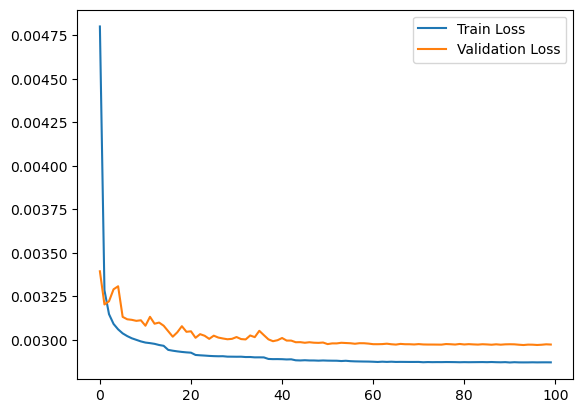

Test RMSE: 0.054467350244522095


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

# Transformer 模型
class TransformerTimeSeriesModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_heads, num_classes, dropout_rate):
        super(TransformerTimeSeriesModel, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_size)
        self.positional_encoding = nn.Parameter(torch.zeros(1, 100, hidden_size))  # 100 为最大序列长度，可调整
        self.encoder_layer = nn.TransformerEncoderLayer(
            d_model=hidden_size,
            nhead=num_heads,
            dim_feedforward=hidden_size * 4,
            dropout=dropout_rate,
            activation="relu"
        )
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        # Embedding + Positional Encoding
        x = self.embedding(x) + self.positional_encoding[:, :seq_len, :]
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Global average pooling over the sequence length
        x = self.fc(x)
        return x

# 超参数
input_size = 4
hidden_size = 256
num_layers = 4
num_heads = 8
num_classes = 3
dropout_rate = 0.1
batch_size = 256
learning_rate = 0.0001
num_epochs = 100
early_stopping_patience = 20

# 数据加载器
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

# 模型定义
model = TransformerTimeSeriesModel(input_size, hidden_size, num_layers, num_heads, num_classes, dropout_rate)
model = model.to(device)
model = nn.DataParallel(model)

# 损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=3, min_lr=1e-6, verbose=True)

# 模型训练
best_loss = np.inf
early_stopping_counter = 0
loss_values = []

for epoch in range(num_epochs):
    model.train()
    train_losses = []
    for x_batch, y_batch in tqdm(train_loader, desc=f"Train Epoch {epoch + 1}", unit="batch"):
        x_batch = x_batch.to(device).float()
        y_batch = y_batch.to(device).float()
        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    val_losses = []
    model.eval()
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch = x_batch.to(device).float()
            y_batch = y_batch.to(device).float()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            val_losses.append(loss.item())

    train_loss = np.mean(train_losses)
    val_loss = np.mean(val_losses)
    scheduler.step(val_loss)
    loss_values.append([train_loss, val_loss])

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss}, Validation Loss: {val_loss}")
    if val_loss < best_loss:
        best_loss = val_loss
        best_model = deepcopy(model.state_dict())
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
        print(f"EarlyStopping counter: {early_stopping_counter} out of {early_stopping_patience}")
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping")
            break

# 保存模型
torch.save(best_model, "transformer_timeseries_model.pth")

# 绘制 Loss 曲线
loss_values = np.array(loss_values)
plt.plot(loss_values[:, 0], label="Train Loss")
plt.plot(loss_values[:, 1], label="Validation Loss")
plt.legend()
plt.show()

# 模型评估
model.load_state_dict(best_model)
model.eval()
predictions = []
targets = []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch = x_batch.to(device).float()
        y_batch = y_batch.to(device).float()
        outputs = model(x_batch)
        predictions.append(outputs.cpu().numpy())
        targets.append(y_batch.cpu().numpy())

predictions = np.concatenate(predictions)
targets = np.concatenate(targets)
rmse = np.sqrt(mean_squared_error(targets, predictions))
print(f"Test RMSE: {rmse}")


In [ ]:
%%time
from torch.nn.parallel import DataParallel
import torch.nn.functional as F

hidden_size = 256
num_layers = 2
batch_size = 128
train_loader = DataLoader(train_data, shuffle=False, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

# BiLSTM-MAIN model
class MultiHeadSelfAttention(nn.Module):
    def __init__(self, hidden_size, num_heads):
        super(MultiHeadSelfAttention, self).__init__()
        self.num_heads = num_heads
        self.head_dim = hidden_size // num_heads
        assert hidden_size % num_heads == 0, "hidden_size must be divisible by num_heads"
        
        self.attention_heads = nn.Parameter(torch.Tensor(num_heads, self.head_dim, 1))
        nn.init.xavier_uniform_(self.attention_heads)
        
        self.fc = nn.Linear(hidden_size, hidden_size)

    def forward(self, lstm_output):
        batch_size, seq_len, hidden_size = lstm_output.size(0), lstm_output.size(1), lstm_output.size(2)
        # Reshape lstm_output to (batch_size, seq_len, num_heads, head_dim)
        lstm_output = lstm_output.view(batch_size, seq_len, self.num_heads, self.head_dim)
        # Transpose for matrix multiplication: (batch_size, num_heads, seq_len, head_dim)
        lstm_output = lstm_output.transpose(1, 2)
        # Compute attention scores
        attention_scores = torch.matmul(lstm_output, self.attention_heads)
        # Apply softmax to get the weights on the values
        attention_scores = F.softmax(attention_scores, dim=-2)
        # Apply attention weights to lstm_output
        weighted_output = attention_scores * lstm_output
        # Sum weighted output over seq_len dimension
        weighted_output = weighted_output.sum(dim=-2)
        # Reshape weighted_output to (batch_size, hidden_size)
        weighted_output = weighted_output.reshape(batch_size, -1)
        # Pass through the fully connected layer
        output = self.fc(weighted_output)
        return output

# BiLSTM-MAIN model
class LSTMWithMulAttention(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate, num_heads):
        super(LSTMWithMulAttention, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.attention = MultiHeadSelfAttention(hidden_size*2, num_heads)  # 注意hidden_size*2因为BiLSTM
        self.layer_norm = nn.LayerNorm(hidden_size*2)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size*2, num_classes)
        # 添加残差连接的线性层
        self.residual_fc = nn.Linear(hidden_size*2, hidden_size*2)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(x.device)  # 乘以2因为BiLSTM
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(x.device)
        lstm_out, _ = self.lstm(x, (h0, c0))
        # 添加残差连接
        residual_output = lstm_out + self.residual_fc(lstm_out)
        lstm_out = self.layer_norm(residual_output)
        attn_out = self.attention(lstm_out)
        drop_out = self.dropout(attn_out)
        out = self.fc(drop_out)
        return out

# print('X_train.shape[-1]:',X_train.shape[-1])

input_size = 4
num_classes= 3
# model = LSTM(input_size, hidden_size, num_layers, num_classes, dropout_prob=0)
#model = LSTMWithAttention(input_size, hidden_size, num_layers, num_classes, dropout_rate = 0.2)
model = LSTMWithMulAttention(input_size, hidden_size, num_layers, num_classes, dropout_rate=0.1, num_heads=8)
# print('num_classes:', num_classes)
model = model.to(device)
model = nn.DataParallel(model)
criterion = nn.MSELoss() #nn.CrossEntropyLoss() #nn.MSELoss() #custom_loss 
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = ReduceLROnPlateau(optimizer, 'min',factor=0.5, patience=3, min_lr=1e-6, verbose=True)

# 训练模型
num_epochs = 100
best_loss = np.inf
early_stopping_patience = 20
early_stopping_counter = 0
loss_values = []

for epoch in range(num_epochs):
    model.train()
    train_losses = []
    for i, (x_batch, y_batch) in enumerate(tqdm(train_loader, desc=f"train epoch {epoch}" ,unit="batch")): #tqdm(train_loader, desc=f"train epoch {epoch}" ,unit="batch"))
        # one_batch_bar.set_description(f'[ epoch: {ep+1} ]')
        x_batch = x_batch.to(device).float()
        y_batch = y_batch.to(device).float()
#         print('x_batch:', x_batch.shape)
#         print('y_batch:', y_batch.shape)
        
        optimizer.zero_grad()
        # print('x_batch shape:',x_batch.shape[0])
        # print(x_batch.shape)
        x_batch = x_batch.view(-1, sequence_length, input_size)
        y_batch = y_batch.view(-1, num_classes)
        
        outputs = model(x_batch)
        # print('outputs:', outputs.shape)
        loss = criterion(outputs, y_batch) #, x_batch
        loss.backward()
        optimizer.step()
        # break
        train_losses.append(loss.item())
        # 更新进度条后缀信息，显示当前损失值
        # tqdm.set_postfix({'loss': loss / (100 * (epoch+1))}, refresh=True)
    
    val_losses = []
    model.eval()
    with torch.no_grad():
        # for i, (x_batch, y_batch) in enumerate(test_loader):
        for i, (x_batch, y_batch) in enumerate(test_loader):
            x_batch = x_batch.to(device).float()
            y_batch = y_batch.to(device).float()
            
            x_batch = x_batch.view(-1, sequence_length, input_size)
            y_batch = y_batch.view(-1, num_classes)
            # y_batch = y_batch.squeeze().long()
            
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch) #, x_batch
            val_losses.append(loss.item())

    train_loss = np.mean(train_losses)
    val_loss = np.mean(val_losses)
    scheduler.step(train_loss)
    loss_values.append([train_loss, val_loss])

    # if epoch%10==0 :
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Validation Loss: {val_loss}', "Current learning rate:", scheduler.get_last_lr()[0])
    # 在每个 epoch 结束时获取最后设置的学习率并打印

    if train_loss - best_loss < -0.000001:
        # early_stopping_counter = 0
        best_loss = train_loss
        best_model = deepcopy(model.state_dict())
    else:
        early_stopping_counter += 1
        print(f'EarlyStopping counter: {early_stopping_counter} out of {early_stopping_patience}')
        if early_stopping_counter >= early_stopping_patience:
            model.load_state_dict(best_model)
            print('Early stopping')
            break

# 保存最好的模型
torch.save(best_model, '../model/tran_T1500_s2s.pth')#########################################################

# 画出loss变化曲线
loss_values = np.array(loss_values)
plt.plot(loss_values[:, 0], label='Train Loss')
plt.plot(loss_values[:, 1], label='Validation Loss')
plt.legend()
plt.show()

# 评估预测结果
model.eval()
predictions = []
targets = []
with torch.no_grad():
    for i, (x_batch, y_batch) in enumerate(test_loader):
        x_batch = x_batch.to(device).float()
        y_batch = y_batch.to(device).float()
        x_batch = x_batch.view(-1, sequence_length, input_size)
        y_batch = y_batch.view(-1, num_classes)
        outputs = model(x_batch)
        predictions.append(outputs.cpu().numpy())
        targets.append(y_batch.cpu().numpy()) 

predictions = np.concatenate(predictions)
targets = np.concatenate(targets) 
print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Validation Loss: {val_loss}')
print('Test RMSE:', np.sqrt(mean_squared_error(targets, predictions)))

train epoch 0: 100%|██████████| 9494/9494 [01:04<00:00, 147.40batch/s]


Epoch 1/100, Train Loss: 0.004371444407542771, Validation Loss: 0.0032373176863855955 Current learning rate: 0.0001


train epoch 1: 100%|██████████| 9494/9494 [01:20<00:00, 118.51batch/s]


Epoch 2/100, Train Loss: 0.003193677329508745, Validation Loss: 0.0029192774762021906 Current learning rate: 0.0001


train epoch 2: 100%|██████████| 9494/9494 [00:47<00:00, 200.02batch/s]


Epoch 3/100, Train Loss: 0.0029639536732996062, Validation Loss: 0.0028194597676584007 Current learning rate: 0.0001


train epoch 3: 100%|██████████| 9494/9494 [00:44<00:00, 215.18batch/s]


Epoch 4/100, Train Loss: 0.0028739052550983846, Validation Loss: 0.0027693824845072324 Current learning rate: 0.0001


train epoch 4: 100%|██████████| 9494/9494 [00:41<00:00, 226.18batch/s]


Epoch 5/100, Train Loss: 0.0028183501361551317, Validation Loss: 0.002719771567205105 Current learning rate: 0.0001


train epoch 5: 100%|██████████| 9494/9494 [00:42<00:00, 221.76batch/s]


Epoch 6/100, Train Loss: 0.00277170474006684, Validation Loss: 0.002685194788298547 Current learning rate: 0.0001


train epoch 6: 100%|██████████| 9494/9494 [00:44<00:00, 214.04batch/s]


Epoch 7/100, Train Loss: 0.002727246381925677, Validation Loss: 0.002630731428548867 Current learning rate: 0.0001


train epoch 7: 100%|██████████| 9494/9494 [00:42<00:00, 223.44batch/s]


Epoch 8/100, Train Loss: 0.0026908586313489666, Validation Loss: 0.0025939730549100334 Current learning rate: 0.0001


train epoch 8: 100%|██████████| 9494/9494 [00:43<00:00, 217.04batch/s]


Epoch 9/100, Train Loss: 0.0026649239478650135, Validation Loss: 0.0025718616167567255 Current learning rate: 0.0001


train epoch 9: 100%|██████████| 9494/9494 [00:43<00:00, 217.89batch/s]


Epoch 10/100, Train Loss: 0.0026435272905433113, Validation Loss: 0.0025609733039110415 Current learning rate: 0.0001


train epoch 10: 100%|██████████| 9494/9494 [00:43<00:00, 218.21batch/s]


Epoch 11/100, Train Loss: 0.0026252570793992695, Validation Loss: 0.0025437025406845858 Current learning rate: 0.0001


train epoch 11: 100%|██████████| 9494/9494 [00:43<00:00, 217.57batch/s]


Epoch 12/100, Train Loss: 0.002608971793682285, Validation Loss: 0.002534841334605399 Current learning rate: 0.0001


train epoch 12: 100%|██████████| 9494/9494 [00:52<00:00, 181.03batch/s]


Epoch 13/100, Train Loss: 0.0025961330919022758, Validation Loss: 0.002539175157978647 Current learning rate: 0.0001


train epoch 13: 100%|██████████| 9494/9494 [01:32<00:00, 102.81batch/s]


Epoch 14/100, Train Loss: 0.0025840681055096233, Validation Loss: 0.0025251099328603573 Current learning rate: 0.0001


train epoch 14: 100%|██████████| 9494/9494 [01:36<00:00, 97.88batch/s] 


Epoch 15/100, Train Loss: 0.00257339838494733, Validation Loss: 0.002525833382497725 Current learning rate: 0.0001


train epoch 15: 100%|██████████| 9494/9494 [01:36<00:00, 98.51batch/s] 


Epoch 16/100, Train Loss: 0.0025629471173171424, Validation Loss: 0.002511075002988634 Current learning rate: 0.0001


train epoch 16: 100%|██████████| 9494/9494 [01:36<00:00, 98.62batch/s] 


Epoch 17/100, Train Loss: 0.002554426240168492, Validation Loss: 0.0025228406469834253 Current learning rate: 0.0001


train epoch 17: 100%|██████████| 9494/9494 [01:41<00:00, 93.72batch/s] 


Epoch 18/100, Train Loss: 0.002545200932169282, Validation Loss: 0.002513777742503905 Current learning rate: 0.0001


train epoch 18: 100%|██████████| 9494/9494 [01:34<00:00, 100.61batch/s]


Epoch 19/100, Train Loss: 0.0025376551308853887, Validation Loss: 0.0025014940726277852 Current learning rate: 0.0001


train epoch 19: 100%|██████████| 9494/9494 [01:14<00:00, 126.92batch/s]


Epoch 20/100, Train Loss: 0.0025306304076901194, Validation Loss: 0.0025029980131355918 Current learning rate: 0.0001


train epoch 20: 100%|██████████| 9494/9494 [01:25<00:00, 111.16batch/s]


Epoch 21/100, Train Loss: 0.0025240228105012654, Validation Loss: 0.002499142336210894 Current learning rate: 0.0001


train epoch 21: 100%|██████████| 9494/9494 [01:27<00:00, 108.03batch/s]


Epoch 22/100, Train Loss: 0.002517341181629891, Validation Loss: 0.0025051737958479577 Current learning rate: 0.0001


train epoch 22: 100%|██████████| 9494/9494 [01:25<00:00, 110.97batch/s]


Epoch 23/100, Train Loss: 0.002511793921784228, Validation Loss: 0.0025080463958381586 Current learning rate: 0.0001


train epoch 23: 100%|██████████| 9494/9494 [01:24<00:00, 112.83batch/s]


Epoch 24/100, Train Loss: 0.002505781467416267, Validation Loss: 0.002500966989716854 Current learning rate: 0.0001


train epoch 24: 100%|██████████| 9494/9494 [01:24<00:00, 111.75batch/s]


Epoch 25/100, Train Loss: 0.002501671671775078, Validation Loss: 0.002510332968117932 Current learning rate: 0.0001


train epoch 25: 100%|██████████| 9494/9494 [01:24<00:00, 112.52batch/s]


Epoch 26/100, Train Loss: 0.0024942398531804244, Validation Loss: 0.0025086776630212078 Current learning rate: 0.0001


train epoch 26: 100%|██████████| 9494/9494 [01:24<00:00, 111.99batch/s]


Epoch 27/100, Train Loss: 0.002490309561498445, Validation Loss: 0.002514456298815195 Current learning rate: 0.0001


train epoch 27: 100%|██████████| 9494/9494 [01:14<00:00, 127.98batch/s]


Epoch 28/100, Train Loss: 0.002483460960951385, Validation Loss: 0.0024950747159433245 Current learning rate: 0.0001


train epoch 28: 100%|██████████| 9494/9494 [01:26<00:00, 110.01batch/s]


Epoch 29/100, Train Loss: 0.0024793390495995533, Validation Loss: 0.002481119498653256 Current learning rate: 0.0001


train epoch 29: 100%|██████████| 9494/9494 [01:03<00:00, 148.36batch/s]


Epoch 30/100, Train Loss: 0.00247374125266067, Validation Loss: 0.0024932752258602976 Current learning rate: 0.0001


train epoch 30: 100%|██████████| 9494/9494 [00:43<00:00, 220.58batch/s]


Epoch 31/100, Train Loss: 0.0024688422811767843, Validation Loss: 0.002491484467561191 Current learning rate: 0.0001


train epoch 31: 100%|██████████| 9494/9494 [00:42<00:00, 220.83batch/s]


Epoch 32/100, Train Loss: 0.002463821639477611, Validation Loss: 0.0025235325354267786 Current learning rate: 0.0001


train epoch 32: 100%|██████████| 9494/9494 [00:43<00:00, 219.42batch/s]


Epoch 33/100, Train Loss: 0.0024570353857041754, Validation Loss: 0.0024991798722228172 Current learning rate: 0.0001


train epoch 33: 100%|██████████| 9494/9494 [00:43<00:00, 218.12batch/s]


Epoch 34/100, Train Loss: 0.002449522194718542, Validation Loss: 0.002508985898565099 Current learning rate: 0.0001


train epoch 34: 100%|██████████| 9494/9494 [00:42<00:00, 221.21batch/s]


Epoch 35/100, Train Loss: 0.002443833322930095, Validation Loss: 0.002514969065249632 Current learning rate: 0.0001


train epoch 35: 100%|██████████| 9494/9494 [00:48<00:00, 194.55batch/s]


Epoch 36/100, Train Loss: 0.002436688337656924, Validation Loss: 0.002509809070706429 Current learning rate: 0.0001


train epoch 36:  35%|███▌      | 3347/9494 [00:15<00:27, 220.90batch/s]

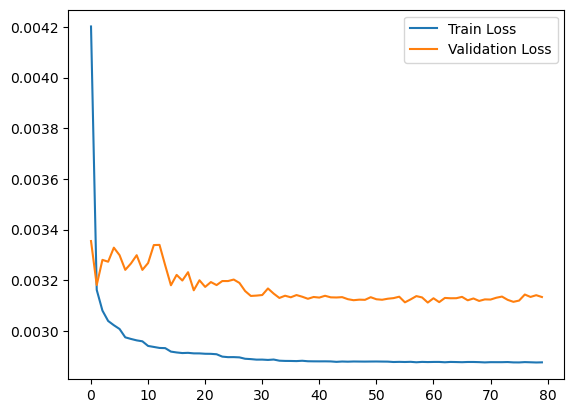

In [21]:
# 画出loss变化曲线
loss_values = np.array(loss_values)
plt.plot(loss_values[:, 0], label='Train Loss')
plt.plot(loss_values[:, 1], label='Validation Loss')
plt.legend()
plt.show()

In [20]:
# 评估预测结果
model.eval()
predictions = []
targets = []
with torch.no_grad():
    for i, (x_batch, y_batch) in enumerate(test_loader):
        x_batch = x_batch.to(device).float()
        y_batch = y_batch.to(device).float()
        x_batch = x_batch.view(-1, sequence_length, input_size)
        y_batch = y_batch.view(-1, input_size)
        outputs = model(x_batch)
        predictions.append(outputs.cpu().numpy())
        targets.append(y_batch.cpu().numpy()) 

predictions = np.concatenate(predictions)
targets = np.concatenate(targets) 

RuntimeError: shape '[-1, 4]' is invalid for input of size 78

In [26]:
# 数据转回原始尺度
predictions = scaler.inverse_transform(predictions)
targets = scaler.inverse_transform(targets)


In [92]:
predictions.shape, targets.shape

((264803, 3), (264803, 3))

In [57]:
predictions_s = predictions
targets_s = targets
predictions = predictions[:, :-1]
targets = targets[:, :-1]

predictions.shape, targets.shape

((264803, 3), (264803, 3))

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 四舍五入的
# pre_round = np.round(new_pred)
print('Test RMSE:', np.sqrt(mean_squared_error(targets, predictions)))
# 计算均方误差（MSE）
mse = mean_squared_error(targets, predictions)
print("Mean Squared Error (MSE):", mse)

# 计算平均绝对误差（MAE）
mae = mean_absolute_error(targets, predictions)
print("Mean Absolute Error (MAE):", mae)

# 计算R平方
r2 = r2_score(targets, predictions)
print("R^2 Score:", r2)

Test RMSE: 0.05446735
Mean Squared Error (MSE): 0.0029666924
Mean Absolute Error (MAE): 0.020587802
R^2 Score: 0.6771691470745553


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 四舍五入的
pre_round = np.round(predictions)
print('Test RMSE:', np.sqrt(mean_squared_error(targets, pre_round)))
# 计算均方误差（MSE）
mse = mean_squared_error(targets, pre_round)
print("Mean Squared Error (MSE):", mse)

# 计算平均绝对误差（MAE）
mae = mean_absolute_error(targets, pre_round)
print("Mean Absolute Error (MAE):", mae)

# 计算R平方
r2 = r2_score(targets, pre_round)
print("R^2 Score:", r2)

Test RMSE: 0.45590147
Mean Squared Error (MSE): 0.20784615
Mean Absolute Error (MAE): 0.11961365
R^2 Score: 0.5988827783207633


: 

In [29]:
#保存预测结果
np.savez('../results/mul_T1500_ss_tran.npz', arr1=targets, arr2=predictions)

In [141]:
predictions[100], targets[100], predictions.shape, targets.shape

(array([1.0047483e+00, 4.1949246e-03, 5.0357013e+00, 2.4206024e+01],
       dtype=float32),
 array([1.        , 0.        , 5.        , 0.99999994], dtype=float32),
 (102104, 4),
 (102104, 4))

In [145]:
y_test[0]

array([1, 0, 1, 1])

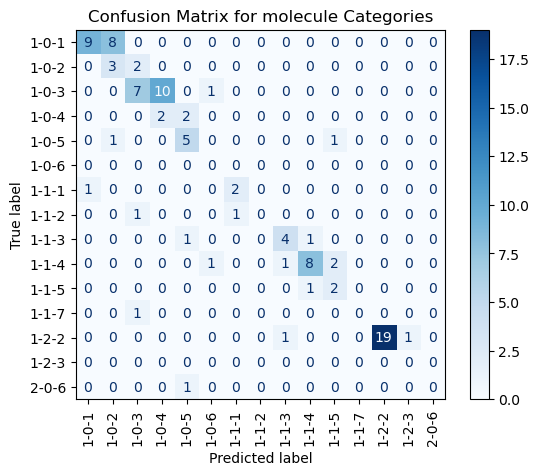

Accuracy: 0.61


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
start = 0
end = 100
p_round = np.round(predictions).astype(int)
t_round = np.round(targets).astype(int)
p1 = p_round[start:end]
t1 = t_round[start:end]
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# 将每个向量转换为字符串形式，便于分类
target_str = ["-".join(map(str, x)) for x in t1]
prediction_str = ["-".join(map(str, x)) for x in p1]

# 找到所有唯一的类别
all_classes = sorted(set(target_str + prediction_str))
class_to_index = {cls: idx for idx, cls in enumerate(all_classes)}

# 将类别字符串映射到索引
target_indices = [class_to_index[cls] for cls in target_str]
prediction_indices = [class_to_index[cls] for cls in prediction_str]

# 计算混淆矩阵
cm = confusion_matrix(target_indices, prediction_indices, labels=range(len(all_classes)))

# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix for molecule Categories")
plt.show()

# 计算准确率
accuracy = accuracy_score(target_indices, prediction_indices)

# 打印评估指标
print(f'Accuracy: {accuracy}')

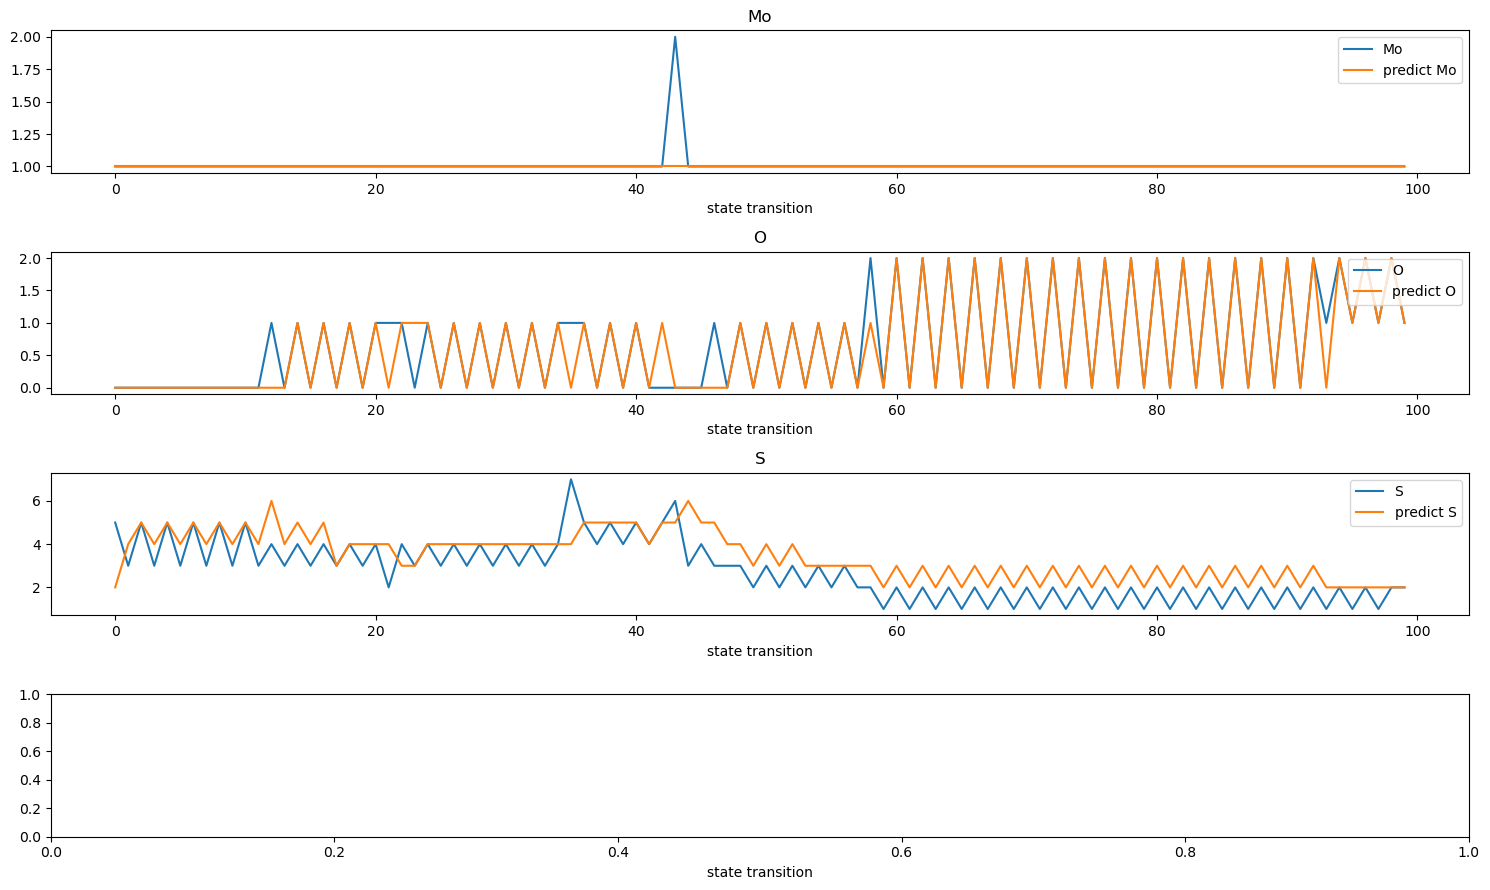

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 生成示例数据
# x = np.linspace(0, 10, 100)
# y1 = np.sin(x)
# y2 = np.cos(x)
# y3 = np.tan(x)
num = 8000
start = 0
end = 100
p_round = predictions.round()
t_round = y_test #targets.round()
p1 = p_round[start:end]
t1 = t_round[start:end]
# 创建一个包含三个子图的画布
fig, axs = plt.subplots(4, 1, figsize=(15, 9))

# 在第一个子图中绘制 y1
axs[0].plot(t1[:, 0], label='Mo')
axs[0].plot(p1[:, 0], label='predict Mo')
#
axs[0].set_title('Mo')
axs[0].legend(loc='upper right')

# 在第二个子图中绘制 y2
axs[1].plot(t1[:, 1], label='O')
axs[1].plot(p1[:, 1], label='predict O')
# axs[1].plot(p1[:, 1], color='blue', label='predict O')
# axs[1].plot(t1[:, 1], color='red', label='O')
axs[1].set_title('O')
axs[1].legend(loc='upper right')
# 在第三个子图中绘制 y3
axs[2].plot(t1[:, 2], label='S')
axs[2].plot(p1[:, 2], label='predict S')
axs[2].set_title('S')
axs[2].legend(loc='upper right')
# 在第三个子图中绘制 y3
# axs[3].plot(t1[:, 3], label='target')
# axs[3].plot(p1[:, 3], label='predict')
# axs[3].set_title('time')
# axs[3].legend(loc='upper right')
# 设置统一的横坐标标签
for ax in axs:
    # plt.xlim(1100, 1200)
    ax.set_xlabel('state transition')
# axs[0].set_xlim(1100, 1200)
# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()
# plt.savefig('result.png')

In [140]:
t_round.shape

NameError: name 't_round' is not defined

In [151]:
dd = np.array(cy_data[0])
dd.shape

(464, 4)

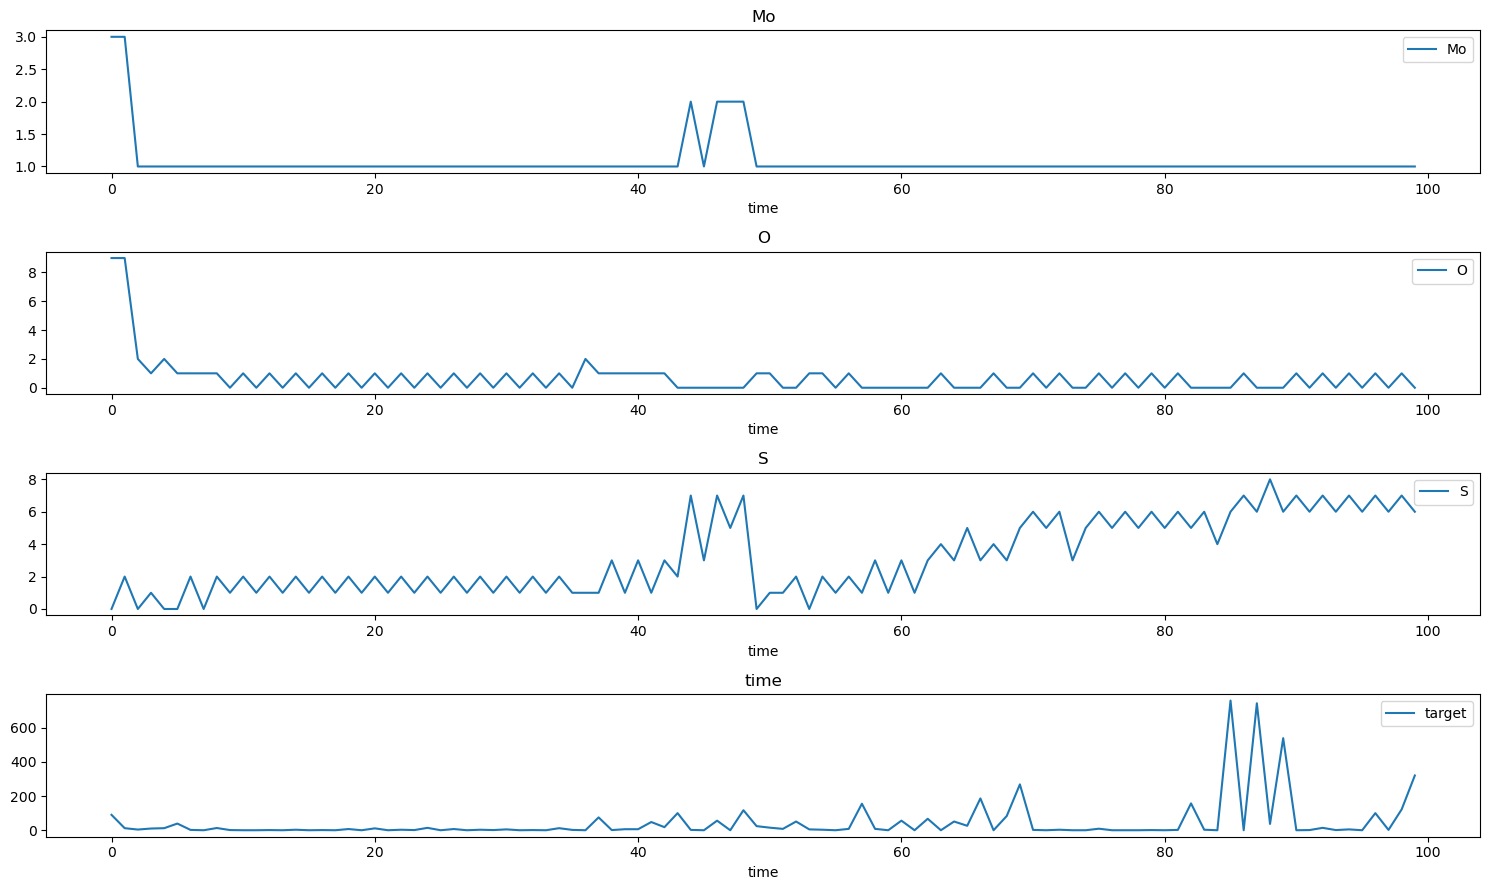

In [152]:
# 可视化cy_data
import matplotlib.pyplot as plt
import numpy as np

# 生成示例数据
# x = np.linspace(0, 10, 100)
# y1 = np.sin(x)
# y2 = np.cos(x)
# y3 = np.tan(x)
num = 8000
start = 0
end = 100
# p_round = predictions.round()
t_round = dd #targets.round()
# p1 = p_round[start:end, :]
t1 = t_round[start:end, :]
# 创建一个包含三个子图的画布
fig, axs = plt.subplots(4, 1, figsize=(15, 9))

# 在第一个子图中绘制 y1
axs[0].plot(t1[:, 0], label='Mo')
# axs[0].plot(p1[:, 0], label='predict Mo')
#
axs[0].set_title('Mo')
axs[0].legend(loc='upper right')

# 在第二个子图中绘制 y2
axs[1].plot(t1[:, 1], label='O')
# axs[1].plot(p1[:, 1], label='predict O')
# axs[1].plot(p1[:, 1], color='blue', label='predict O')
# axs[1].plot(t1[:, 1], color='red', label='O')
axs[1].set_title('O')
axs[1].legend(loc='upper right')
# 在第三个子图中绘制 y3
axs[2].plot(t1[:, 2], label='S')
# axs[2].plot(p1[:, 2], label='predict S')
axs[2].set_title('S')
axs[2].legend(loc='upper right')
# 在第三个子图中绘制 y3
axs[3].plot(t1[:, 3], label='target')
# axs[3].plot(p1[:, 3], label='predict')
axs[3].set_title('time')
axs[3].legend(loc='upper right')
# 设置统一的横坐标标签
for ax in axs:
    # plt.xlim(1100, 1200)
    ax.set_xlabel('time')
# axs[0].set_xlim(1100, 1200)
# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()
# plt.savefig('result.png')

In [1]:
import numpy as np
ss = np.load('../results/mul_T900_ss.npz')
ss_targets = ss['arr1']
ss_predictions = ss['arr2']

sts = np.load('../results/mul_T900_sts.npz')
sts_targets = sts['arr1']
sts_predictions = sts['arr2']

stst = np.load('../results/mul_T900_stst.npz')
stst_targets = stst['arr1']
stst_predictions = stst['arr2']

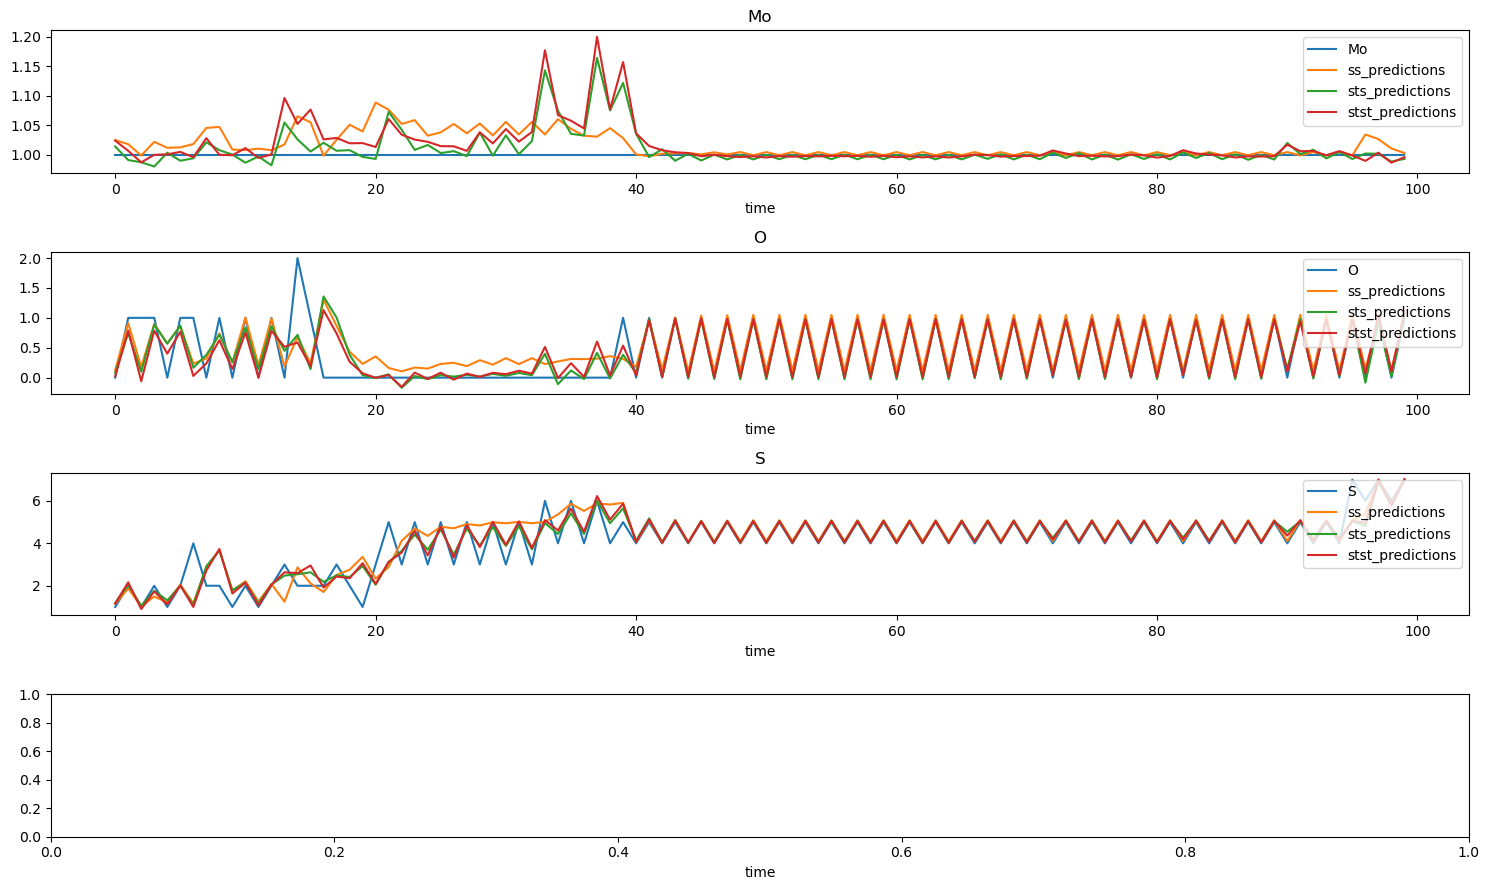

In [3]:
# 可视化cy_data
import matplotlib.pyplot as plt
import numpy as np

# 生成示例数据
# x = np.linspace(0, 10, 100)
# y1 = np.sin(x)
# y2 = np.cos(x)
# y3 = np.tan(x)
num = 8000
start = 0
end = 100
# p_round = predictions.round()
t_round = stst_targets #targets.round()
# p1 = p_round[start:end, :]
t1 = t_round[start:end, :]
# 创建一个包含三个子图的画布
fig, axs = plt.subplots(4, 1, figsize=(15, 9))

# 在第一个子图中绘制 y1
axs[0].plot(t1[:, 0], label='Mo')
axs[0].plot(ss_predictions[start:end, 0], label='ss_predictions')
axs[0].plot(sts_predictions[start:end, 0], label='sts_predictions')
axs[0].plot(stst_predictions[start:end, 0], label='stst_predictions')
#
axs[0].set_title('Mo')
axs[0].legend(loc='upper right')

# 在第二个子图中绘制 y2
axs[1].plot(t1[:, 1], label='O')
axs[1].plot(ss_predictions[start:end, 1], label='ss_predictions')
axs[1].plot(sts_predictions[start:end, 1], label='sts_predictions')
axs[1].plot(stst_predictions[start:end, 1], label='stst_predictions')
# axs[1].plot(p1[:, 1], label='predict O')
# axs[1].plot(p1[:, 1], color='blue', label='predict O')
# axs[1].plot(t1[:, 1], color='red', label='O')
axs[1].set_title('O')
axs[1].legend(loc='upper right')
# 在第三个子图中绘制 y3
axs[2].plot(t1[:, 2], label='S')
axs[2].plot(ss_predictions[start:end, 2], label='ss_predictions')
axs[2].plot(sts_predictions[start:end, 2], label='sts_predictions')
axs[2].plot(stst_predictions[start:end, 2], label='stst_predictions')
# axs[2].plot(p1[:, 2], label='predict S')
axs[2].set_title('S')
axs[2].legend(loc='upper right')
# 在第三个子图中绘制 y3
# axs[3].plot(t1[:, 3], label='target')
# # axs[3].plot(p1[:, 3], label='predict')
# axs[3].set_title('time')
# axs[3].legend(loc='upper right')
# 设置统一的横坐标标签
for ax in axs:
    # plt.xlim(1100, 1200)
    ax.set_xlabel('time')
# axs[0].set_xlim(1100, 1200)
# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()
# plt.savefig('result.png')